### TASK: FORECASTING

Forecasting the  Airlines Passengers data set

IMPORTING LIBRARIES

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns

IMPORTING DATA

In [4]:
from google.colab import files
uploaded=files.upload()

Saving Airlines+Data.xlsx to Airlines+Data (1).xlsx


In [5]:
airlines=pd.read_excel('Airlines+Data.xlsx')

In [6]:
airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [7]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [8]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


## Histogram and Density Plots

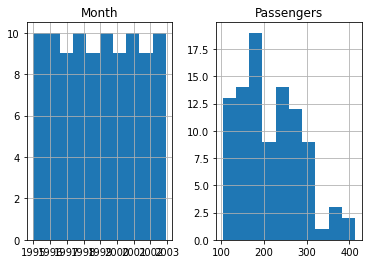

In [9]:
# create a histogram plot
airlines.hist()
pyplot.show()


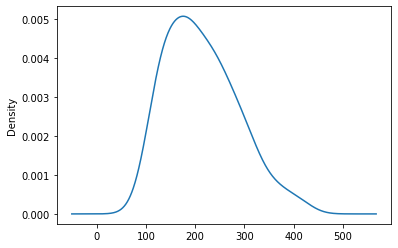

In [10]:
airlines.Passengers.plot(kind='kde')

## LinePlot

In [11]:
series1 = pd.read_excel('C:\ExcelrPy\Assignment-18\Airlines+Data.xlsx', header=0, index_col=0)
series1.plot()
pyplot.show()

FileNotFoundError: ignored

In [ ]:
series1

### Lag plot

In [ ]:
# create a scatter plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(series1)
pyplot.show()

### ACF PLot

In [ ]:
# create an autocorrelation plot
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series1,lags=30)
pyplot.show()

# SquareTransformation

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot

# Upsampling the data to each and every day

In [ ]:
upsampled = series1.resample('D').mean()
print(upsampled.head(32))

In [ ]:
##### interpolate the missing value
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

# Before Transformation 

In [ ]:
# line plot
pyplot.subplot(211)
pyplot.plot(interpolated)
# histogram
pyplot.subplot(212)
pyplot.hist(interpolated)
pyplot.show()

In [ ]:
interpolated

#### Square Root Transform

In [ ]:
dataframe = DataFrame(interpolated)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = sqrt(dataframe['Passengers'])

In [ ]:
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Passengers'])
pyplot.show()

In [ ]:
interpolated

#### Log Transform

In [ ]:
from numpy import log
dataframe = DataFrame(interpolated)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = log(dataframe['Passengers'])

# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Passengers'])
pyplot.show()

In [ ]:
interpolated

In [ ]:
interpolated.info()

# Plotting Heatmap

In [ ]:
airlines

In [ ]:
airlines["Date"]=pd.to_datetime(airlines.Month,format="%b-%y")
airlines["Months"]=airlines.Date.dt.strftime("%b")
airlines["Year"]=airlines.Date.dt.strftime("%Y")

In [ ]:
# Heatmap
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=airlines,values="Passengers",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


In [ ]:

sns.boxplot(x="Months",y="Passengers",data=airlines)
sns.boxplot(x="Year",y="Passengers",data=airlines)


In [ ]:

Month_Dummies = pd.DataFrame(pd.get_dummies(airlines['Months']))
airline1 = pd.concat([airlines,Month_Dummies],axis = 1)


In [ ]:
airline1["t"] = np.arange(1,97)
airline1["t_squared"] = airline1["t"]*airline1["t"]
airline1["Log_Passengers"] = np.log(airline1["Passengers"])


In [ ]:
airline1

In [ ]:

plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Passengers",data=airlines)



In [ ]:

Train = airline1.head(80)
Test = airline1.tail(16)


In [ ]:
# Linear Model
import statsmodels.formula.api as smf 
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear


In [ ]:

# Exponential Model
Exp = smf.ols('Log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


In [ ]:

# Quadratic Model
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad



In [ ]:

# Additive seasonality
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

In [ ]:
# Additive Seasonality quadrative

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad=pd.Series(add_sea_Quad.predict(Test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

In [ ]:
#Multiplicative Seasonality

Mul_sea = smf.ols('Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

In [ ]:
#Multiplicative addditive seasonality

Mul_Add_sea = smf.ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 


TESTING

In [ ]:


data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse



### PREDICT WITH NEW DATA

In [ ]:
t = np.arange(97,108)
t

In [ ]:
t_squared=np.array(t*t)
t_squared

In [ ]:
Month = pd.DataFrame({'Month':['2003-01-01','2003-02-01','2003-03-01','2003-04-01','2003-05-01','2003-06-01','2003-07-01',
                               '2003-08-01','2003-09-01','2003-10-01','2003-10-01']})


In [ ]:
df={'t':t,'t_squared':t_squared}
df=pd.DataFrame(df)


In [ ]:
newdata = pd.concat([Month,df],axis=1)
newdata

### Build the model on entire dataset

In [ ]:
model_full = smf.ols('Passengers~t',data=airline1).fit()
pred_new  = pd.Series(model_full.predict(newdata))
pred_new


In [ ]:
newdata["forecasted_passengers"]=pd.Series(pred_new)

In [ ]:
newdata

OBSERVATION:
    
Multiplicative Additive Seasonality gives the best prediction of least RMSE of 9.42    